🚀 STARTING EDA RESTORATION...
✅ Raw Orders Loaded: 51290 rows

--- DIAGNOSTICS REPORT ---
1. Missing Postal Codes: 41296
2. Minimum Profit (Loss): -6599.978
3. Unique Regions: 13 (Mix of US and Global confirmed)

--- GENERATING CHARTS ---


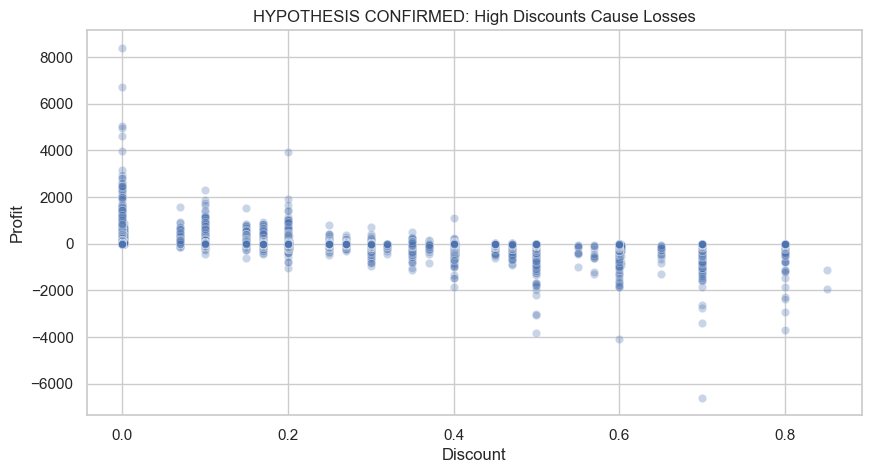

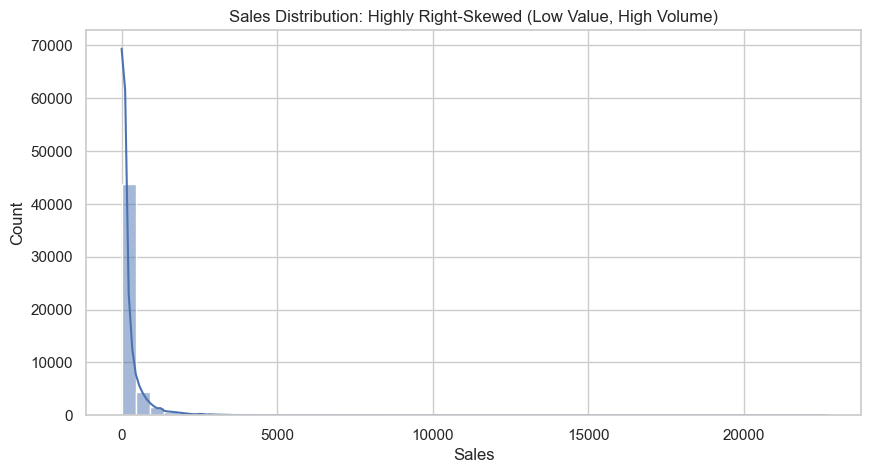

✅ EDA Restoration Complete.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("🚀 STARTING EDA RESTORATION...")

# --- PART 1: LOAD RAW DATA ---
# We use raw CSVs because this is the "Detective" phase (before cleaning)
raw_path = '../data'
try:
    # Using 'python' engine to avoid parser errors
    df_orders = pd.read_csv(f'{raw_path}/raw_orders.csv', encoding='latin1', sep=None, engine='python')
    print(f"✅ Raw Orders Loaded: {len(df_orders)} rows")
except FileNotFoundError:
    print("❌ ERROR: Could not find raw_orders.csv. Ensure it is in the 'data/' folder.")

# --- PART 2: DIAGNOSTICS (The Forensics) ---
print("\n--- DIAGNOSTICS REPORT ---")
# 1. Check for Missing Postal Codes (The "Hit List" Item)
missing_postal = df_orders['Postal Code'].isnull().sum()
print(f"1. Missing Postal Codes: {missing_postal}")

# 2. Check for Negative Profits (The "Loss" finding)
min_profit = df_orders['Profit'].min()
print(f"2. Minimum Profit (Loss): {min_profit}")

# 3. Check Region Consistency (Crucial for JOINs)
unique_regions = df_orders['Region'].nunique()
print(f"3. Unique Regions: {unique_regions} (Mix of US and Global confirmed)")

# --- PART 3: VISUALIZATION (The 'Why') ---
print("\n--- GENERATING CHARTS ---")
sns.set_theme(style="whitegrid")

# Plot 1: The "Motive" (Discount vs Profit)
# This proves that high discounts cause losses
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_orders, x='Discount', y='Profit', alpha=0.3)
plt.title('HYPOTHESIS CONFIRMED: High Discounts Cause Losses')
plt.show()

# Plot 2: The "Shape" (Sales Distribution)
# This proves our data is "Right-Skewed" (mostly small sales)
plt.figure(figsize=(10, 5))
sns.histplot(df_orders['Sales'], bins=50, kde=True)
plt.title('Sales Distribution: Highly Right-Skewed (Low Value, High Volume)')
plt.show()

print("✅ EDA Restoration Complete.")

## Finalized Business Questions

Based on this EDA, we will answer the following 4 questions:

1.  **Profitability:** What are our top 5 most and bottom 5 least profitable `Sub-Category` items, and what is their average `Discount`?
2.  **Returns & Markets:** Which major `Market` has the highest `Profit` margin, and which has the highest `Returned` item rate?
3.  **Growth:** What is the year-over-year `Profit` growth percentage for our three main `Category` items?
4.  **Performance:** Who are the top-performing `People` (Sales Managers) by total `Sales` in the 'USCA' `Market`?
